# Ask 
***· What is the data about?***  
&ensp;·Data science job posting on Glassdoor.

***· What is the main purpose?***  
&ensp;·Cleaning data and transformating it.

***·What is the problem that need to be solved?***  
&ensp;· Make the salary column into integers.  
&ensp;· Extract information out of job description.  
&ensp;· Remove the numbers from the company name.  
&ensp;· Create a state column from the location column.

***· What is the problem that you’re trying to solve?***  
&ensp;·What skills are necessary.  
&ensp;·Count each skills' amount.

In real world, we also need to do as listed:
<br/>&ensp;·Define the problem you’re trying to solve.
<br/>&ensp;·Make sure you fully understand the stakeholder’s expectations.
<br/>&ensp;·Focus on the actual problem and avoid any distractions.
<br/>&ensp;·Collaborate with stakeholders and keep an open line of communication.
<br/>&ensp;·Take a step back and see the whole situation in context.

# Prepare

***·What metrics to measure?***
<br />&ensp;Using each company's rating, salary and skills for the job.

***·Locate data in your database***  
&ensp;

***·Create security measures to protect that data***  
&ensp;

# Process

In [1]:
# Import pandas library for cleaning 
import pandas as pd
import numpy as np # Linear algebra

In [2]:
# Import the csv file of the dataset and name it as Data
Data = pd.read_csv("Uncleaned_DS_jobs.csv")

In [3]:
# Check the first 6 line of the data
Data.head(6)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
5,5,Data Scientist,$137K-$171K (Glassdoor est.),About Us:\n\nHeadquartered in beautiful Santa ...,4.2,HG Insights\n4.2,"Santa Barbara, CA","Santa Barbara, CA",51 to 200 employees,2010,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1


In [4]:
# View the overall information in the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


It shows that the dataset are in a dataframe format, and there are total of 672 entries which is from 0 to 671. There are total of 15 columns, the name of each column shows on the output table. The structure of the data are float64, int64, and object, the number of each structure are 1, 2, and 12 respectively. No null valuse at all.

In [5]:
# Change the data to a snake based format which make names clearer and consistent, avoid spaces or mixed cases.
Data.rename(columns = lambda header:header.lower().replace(" ","_"), inplace = True)

# See if it works
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   job_title          672 non-null    object 
 2   salary_estimate    672 non-null    object 
 3   job_description    672 non-null    object 
 4   rating             672 non-null    float64
 5   company_name       672 non-null    object 
 6   location           672 non-null    object 
 7   headquarters       672 non-null    object 
 8   size               672 non-null    object 
 9   founded            672 non-null    int64  
 10  type_of_ownership  672 non-null    object 
 11  industry           672 non-null    object 
 12  sector             672 non-null    object 
 13  revenue            672 non-null    object 
 14  competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [6]:
# Find if there are duplicate rows in the data
Data[Data.duplicated()]

,index,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors


In [7]:
# Summarize the duplicte rows and columns
Data[Data.duplicated()].shape

(0, 15)

In [8]:
# Drop duplicate rows
Data.drop_duplicates(inplace = True)
# Check remaining rows
Data.shape

(672, 15)

In [9]:
# Delete the index column since deleting rows will cause the index number uncontinuous
Data.drop(columns = "index", inplace = True)
# Check the remain columns
Data.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors'],
      dtype='object')

In [10]:
# Add the index column
Data.reset_index(inplace = True)
Data.shape

(672, 15)

### After general check the data, now solve the problem that mentioned above.

#### Make salary column into integer

In [11]:
# Check total values in salary_estimate column
Data["salary_estimate"].value_counts()

$79K-$131K (Glassdoor est.)     32
$99K-$132K (Glassdoor est.)     32
$75K-$131K (Glassdoor est.)     32
$137K-$171K (Glassdoor est.)    30
$90K-$109K (Glassdoor est.)     30
$56K-$97K (Glassdoor est.)      22
$79K-$106K (Glassdoor est.)     22
$90K-$124K (Glassdoor est.)     22
$110K-$163K (Glassdoor est.)    21
$92K-$155K (Glassdoor est.)     21
$138K-$158K (Glassdoor est.)    21
$128K-$201K (Glassdoor est.)    21
$212K-$331K (Glassdoor est.)    21
$95K-$119K (Glassdoor est.)     21
$69K-$116K (Glassdoor est.)     21
$124K-$198K (Glassdoor est.)    21
$112K-$116K (Glassdoor est.)    21
$122K-$146K (Glassdoor est.)    21
$91K-$150K (Glassdoor est.)     21
$101K-$165K (Glassdoor est.)    21
$79K-$147K (Glassdoor est.)     20
$31K-$56K (Glassdoor est.)      20
$145K-$225K(Employer est.)      20
$141K-$225K (Glassdoor est.)    20
$66K-$112K (Glassdoor est.)     20
$80K-$132K (Glassdoor est.)     20
$87K-$141K (Glassdoor est.)     20
$105K-$167K (Glassdoor est.)    20
$79K-$133K (Glassdoo

In [12]:
# Create new columns
Data["min_salary"] = 0
Data["max_salary"] = 0
Data["avg_salary"] = 0

# Remove extra symbols and character in values
for i in range(len(Data)): # define the sequence length for output.
    try:
        Data.loc[i,"min_salary"] = int(Data["salary_estimate"][i].split(" ")[0].split("-")[0].replace("$","").replace("K",""))
        Data.loc[i,"max_salary"] = int(Data["salary_estimate"][i].split(" ")[0].split("-")[1].replace("$","").replace("K",""))
    except:
        Data.loc[i,"min_salary"] = int(Data["salary_estimate"][i].split("(E")[0].split("-")[0].replace("$","").replace("K",""))
        Data.loc[i,"max_salary"] = int(Data["salary_estimate"][i].split("(E")[0].split("-")[1].replace("$","").replace("K",""))
    finally:
        Data.loc[i,"salary_estimate"] = str(Data.loc[i,"min_salary"]) + "-" + str(Data.loc[i,"max_salary"])
        Data.loc[i,"avg_salary"] = np.mean([Data.loc[i,"min_salary"],Data.loc[i,"max_salary"]])
        
# Check
Data.head(4)

,index,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,min_salary,max_salary,avg_salary
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137,171,154.0
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137,171,154.0
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137,171,154.0
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137,171,154.0


#### Extract information out of job description

In [13]:
# See the first row of job_description
Data["job_description"][0].split("\n\n") # [0] accesses the content of the first row
                                         # .split("\n\n") splits the content of the column cell using double newline characters.

['Description',
 'The Senior Data Scientist is responsible for defining, building, and improving statistical models to improve business processes and outcomes in one or more healthcare domains such as Clinical, Enrollment, Claims, and Finance. As part of the broader analytics team, Data Scientist will gather and analyze data to solve and address complex business problems and evaluate scenarios to make predictions on future outcomes and work with the business to communicate and support decision-making. This position requires strong analytical skills and experience in analytic methods including multivariate regressions, hierarchical linear models, regression trees, clustering methods and other complex statistical techniques.',
 'Duties & Responsibilities:',
 '• Develops advanced statistical models to predict, quantify or forecast various operational and performance metrics in multiple healthcare domains\n• Investigates, recommends, and initiates acquisition of new data resources from int

In [39]:
# Extract the skills need for each job_description (e.g. python, excel, Sql, Sparx, machine learning, aws, Tableau, Power BI.)
Data["Python"] = Data["job_description"].apply(lambda x : 1 if "python" in x.lower() else 0)
Data["Excel"] = Data["job_description"].apply(lambda x : 1 if "excel" in x.lower() else 0)
Data["Sql"] = Data["job_description"].apply(lambda x : 1 if "sql" in x.lower() else 0)
Data["Sparx"] = Data["job_description"].apply(lambda x : 1 if "sparx" in x.lower() else 0)
Data["Machine Learning"] = Data["job_description"].apply(lambda x : 1 if "machine learning" in x.lower() else 0)
Data["AWS"] = Data["job_description"].apply(lambda x : 1 if "aws" in x.lower() else 0)
Data["Tableau"] = Data["job_description"].apply(lambda x : 1 if "tableau" in x.lower() else 0)
Data["Power BI"] = Data["job_description"].apply(lambda x : 1 if "power bi" in x.lower() else 0)

In [41]:
# Count the number of them.
Python = Data["Python"].value_counts()
Excel = Data["Excel"].value_counts()
Sql = Data["Sql"].value_counts()
Sparx= Data["Sparx"].value_counts()
MachineLearning = Data["Machine Learning"].value_counts()
AWS = Data["AWS"].value_counts()
Tableau = Data["Tableau"].value_counts()
PowerBI = Data["Power BI"].value_counts()

# Create a dictionary to store all the count Series
count_series = {
    "Python": Python,
    "Excel": Excel,
    "Sql": Sql,
    "Sparx": Sparx,
    "Machine Learning": MachineLearning,
    "AWS": AWS,
    "Tableau": Tableau,
    "Power BI": PowerBI
}

# Loop through the dictionary and print the value counts for each category
for category, counts in count_series.items():
    print(f"Value counts for '{category}':")
    print(counts)
    print("\n")

Value counts for 'Python':
1    491
0    181
Name: Python, dtype: int64


Value counts for 'Excel':
0    376
1    296
Name: Excel, dtype: int64


Value counts for 'Sql':
1    356
0    316
Name: Sql, dtype: int64


Value counts for 'Sparx':
0    672
Name: Sparx, dtype: int64


Value counts for 'Machine Learning':
1    416
0    256
Name: Machine Learning, dtype: int64


Value counts for 'AWS':
0    498
1    174
Name: AWS, dtype: int64


Value counts for 'Tableau':
0    549
1    123
Name: Tableau, dtype: int64


Value counts for 'Power BI':
0    638
1     34
Name: Power BI, dtype: int64




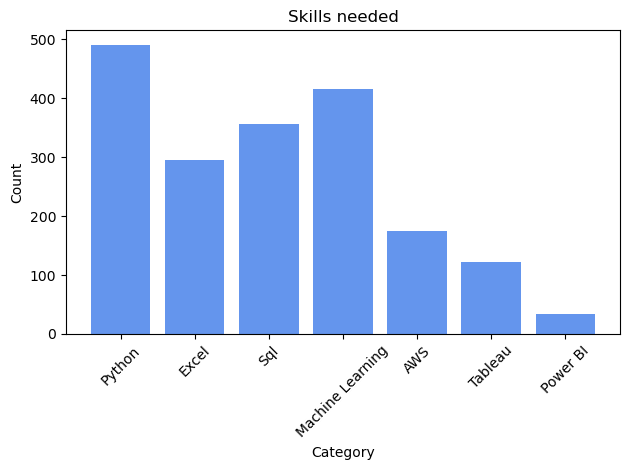

In [44]:
import matplotlib.pyplot as plt

# Assuming Data is your DataFrame containing the counts

categories = ["Python", "Excel", "Sql", "Machine Learning", "AWS", "Tableau", "Power BI"]
counts = [
    Data["Python"].value_counts().get(1, 0),
    Data["Excel"].value_counts().get(1, 0),
    Data["Sql"].value_counts().get(1, 0),
    Data["Machine Learning"].value_counts().get(1, 0),
    Data["AWS"].value_counts().get(1, 0),
    Data["Tableau"].value_counts().get(1, 0),
    Data["Power BI"].value_counts().get(1, 0)
]

plt.bar(categories, counts, color = "cornflowerblue")
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel("Count")
plt.title("Skills needed")
plt.tight_layout()

plt.show()

#### Removing number in company name

In [18]:
# Removing number in company name
Data["company_name"] = Data["company_name"].apply(lambda x:x.split("\n")[0])
# Check data
Data.company_name.head(4)

0       Healthfirst
1           ManTech
2    Analysis Group
3           INFICON
Name: company_name, dtype: object

#### Create a state column from the location column

In [19]:
# Count the number of state after the common in location column
Data["location"].apply(lambda x : x.split(",")[-1]).value_counts()

 CA              165
 VA               89
 MA               62
 NY               52
 MD               40
 IL               30
 DC               26
 TX               17
 WA               16
 OH               14
 PA               12
 MO               12
United States     11
 NJ               10
 CO               10
 GA                9
 NC                9
 TN                8
 FL                8
Remote             6
 OK                6
 WI                6
 IN                5
 MI                5
 AL                4
 CT                4
 MN                4
 AZ                4
 NE                3
 UT                3
 IA                3
 RI                2
New Jersey         2
 SC                2
 OR                2
Utah               2
 NH                2
 MS                1
 LA                1
 KS                1
Texas              1
 DE                1
California         1
 WV                1
Name: location, dtype: int64

In [20]:
# Check where and what has been write in each row of United States
Data.loc[(Data["location"] == "United States"),["location"]]

,location
34,United States
89,United States
227,United States
307,United States
438,United States
473,United States
483,United States
510,United States
570,United States
600,United States


In [21]:
# Brefly check the information of row 34
Data.iloc[34]

index                                                               34
job_title                                                Data Engineer
salary_estimate                                                 75-131
job_description      Chef Software is the industry leader in IT aut...
rating                                                             3.6
company_name                                                      Chef
location                                                 United States
headquarters                                               Seattle, WA
size                                              201 to 500 employees
founded                                                           2008
type_of_ownership                                    Company - Private
industry                       Enterprise Software & Network Solutions
sector                                          Information Technology
revenue                                      $50 to $100 million (USD)
compet

It shows that the location of row 34 only present the information of United States.

In [22]:
# Create a new column called state and add the value after comma in the location column
Data["state"] = Data["location"].apply(lambda x : x.split(",")[-1].strip())

# change the non shorthand words to shorthand
Data["state"].replace(["United States", "Remote", "New Jersey", "Utah", "Texas", "California"], ["US", "Unknown", "NJ", "BS", "TX", "CA"], inplace = True)

Data["state"].value_counts()

CA         166
VA          89
MA          62
NY          52
MD          40
IL          30
DC          26
TX          18
WA          16
OH          14
PA          12
NJ          12
MO          12
US          11
CO          10
GA           9
NC           9
FL           8
TN           8
Unknown      6
OK           6
WI           6
MI           5
IN           5
MN           4
AZ           4
AL           4
CT           4
UT           3
NE           3
IA           3
RI           2
BS           2
SC           2
OR           2
NH           2
MS           1
LA           1
KS           1
DE           1
WV           1
Name: state, dtype: int64

In [23]:
Data.head(5)

,index,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,...,avg_salary,Python,Excel,Sql,Sparx,Machine Learning,AWS,Tableau,Power BI,state
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,...,154.0,0,0,0,0,1,1,0,0,NY
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,...,154.0,0,0,1,0,1,0,0,0,VA
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,...,154.0,1,1,0,0,1,1,0,0,MA
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,...,154.0,1,1,1,0,1,1,0,0,MA
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,...,154.0,1,1,1,0,1,0,0,0,NY


##### If city column is needed, we could create one

In [24]:
# Count the number of city in location column
Data["location"].apply(lambda x : x.split(",")[0]).value_counts()

San Francisco        69
New York             50
Washington           27
Boston               24
Chicago              22
                     ..
Spartanburg           1
West Grove            1
Linthicum Heights     1
Appleton              1
Irwindale             1
Name: location, Length: 204, dtype: int64

In [25]:
# Create a new column called city and add the value before comma in the location column
Data["city"] = Data["location"].apply(lambda x : x.split(",")[0].strip())

# Delete the location column
Data.drop("location", axis = 1, inplace = True) # axis = 1 indicates columns, while 0 indicates rows.
                                                # inplace = True indicates that the original dataframe will be altered without creating a new one.
Data.head(4)

,index,job_title,salary_estimate,job_description,rating,company_name,headquarters,size,founded,type_of_ownership,...,Python,Excel,Sql,Sparx,Machine Learning,AWS,Tableau,Power BI,state,city
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,...,0,0,0,0,1,1,0,0,NY,New York
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,0,0,1,0,1,0,0,0,VA,Chantilly
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,...,1,1,0,0,1,1,0,0,MA,Boston
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,...,1,1,1,0,1,1,0,0,MA,Newton


## Convert in to csv

In [26]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   job_title          672 non-null    object 
 2   salary_estimate    672 non-null    object 
 3   job_description    672 non-null    object 
 4   rating             672 non-null    float64
 5   company_name       672 non-null    object 
 6   headquarters       672 non-null    object 
 7   size               672 non-null    object 
 8   founded            672 non-null    int64  
 9   type_of_ownership  672 non-null    object 
 10  industry           672 non-null    object 
 11  sector             672 non-null    object 
 12  revenue            672 non-null    object 
 13  competitors        672 non-null    object 
 14  min_salary         672 non-null    int64  
 15  max_salary         672 non-null    int64  
 16  avg_salary         672 non

In [27]:
Data.to_csv('Cleaned_DS_jobs',index = None)